<a href="https://colab.research.google.com/github/iamtatha/Stock-Price-Prediction-Model/blob/main/TCS_stock_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd 
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import  LSTM
from keras.layers import Dense
import matplotlib.pyplot as plt
plt.style.use('dark_background')
df = pd.read_csv('gdrive/My Drive/Stocks/TCS/TCS.csv')
df=df.dropna()
df.iloc[0]

Date         2004-08-25
Open            149.837
High            149.837
Low             122.375
Close           123.494
Adj Close       65.6756
Volume           136928
Name: 0, dtype: object

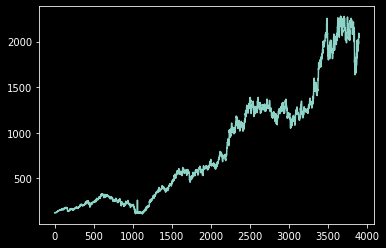

In [ ]:
''' UNNECESSARY '''
plt.plot(df['Close'])
#print(type(df))

In [ ]:
data = df.filter(['Close'])                         #takes out only the column of close
dataset = data.values                               #takes out the values under close
training_data_len = math.ceil(len(dataset)*0.8)     #take 80% of the dataset for training
print(training_data_len)
scaler = MinMaxScaler(feature_range=(0,1))          #sets scaler for the whole set between 0 to 1
scaled_data = scaler.fit_transform(dataset)         #scales the data
print(scaled_data)
train_data = scaled_data[0:training_data_len, : ]   #cuts the dataset into train and test set and stores train set
x_train = []
y_train = []
#df.iloc[3123]
np.shape(train_data)

3108
[[0.00551329]
 [0.00499677]
 [0.00405373]
 ...
 [0.89397159]
 [0.90481907]
 [0.90495758]]


(3108, 1)

In [ ]:
input_days = 75
pred_day = 0
count = 0

for i in range( 2+ input_days ,len(train_data) - pred_day):          #1075-train_data
  count += 1
  x_train.append(train_data[ i - input_days : i , 0 ])
  y_train.append(train_data[ i + pred_day , 0 ])
  if i<= input_days+1:
    print(x_train)
    print('YESSS')
    print(y_train,end='\n')

print(count)

3031


In [ ]:
x_train = np.array(x_train)

In [ ]:
''' UNNECESSARY '''
print(np.shape( x_train ))
x_train

(11129, 75)


array([[0.04592873, 0.04525942, 0.04737122, ..., 0.0062777 , 0.00368676,
        0.00293667],
       [0.04525942, 0.04737122, 0.04830594, ..., 0.00368676, 0.00293667,
        0.0035312 ],
       [0.04737122, 0.04830594, 0.0467019 , ..., 0.00293667, 0.0035312 ,
        0.00419452],
       ...,
       [0.47533695, 0.47678175, 0.48841398, ..., 0.50976276, 0.50512371,
        0.50270957],
       [0.47678175, 0.48841398, 0.48248249, ..., 0.50512371, 0.50270957,
        0.50243725],
       [0.48841398, 0.48248249, 0.48112075, ..., 0.50270957, 0.50243725,
        0.50913038]])

In [ ]:
y_train = np.array(y_train)

In [ ]:
''' UNNECESSARY '''
np.shape( y_train )

(11129,)

In [ ]:
x_train = np.reshape(x_train , ( x_train.shape[0] , x_train.shape[1] , 1 ))
x_train.shape
#print(x_train)

(11129, 75, 1)

In [ ]:
from keras.layers.advanced_activations import LeakyReLU
model = Sequential()
model.add( LSTM( 70, return_sequences = True, input_shape=(x_train.shape[1], 1 )) )
model.add( LSTM( 70, return_sequences = False ) )
model.add( Dense(30) )
model.add( Dense(1) )
#model.add(Dense(800,input_shape=(num_inputs,)))
#model.add(LeakyReLU(alpha=0.1))
model.compile(  loss='mean_squared_error', optimizer='adam' )
model.fit(x_train, y_train, batch_size=1, epochs=1)

11129/11129 [==============================] - 317s 28ms/step - loss: 5.4773e-04


In [ ]:
test_data = scaled_data[training_data_len - input_days: , :]
x_test =[]
y_test = dataset[training_data_len: , :]
for i in range( input_days , len(test_data)):
  x_test.append(test_data[i - input_days :i, 0])
x_test = np.array(x_test)
x_test =np.reshape( x_test , ( x_test.shape[0], x_test.shape[1] ,1 ))

In [ ]:
x_test.shape

(776, 75, 1)

In [ ]:
pred = model.predict(x_test)
pred = scaler.inverse_transform(pred)

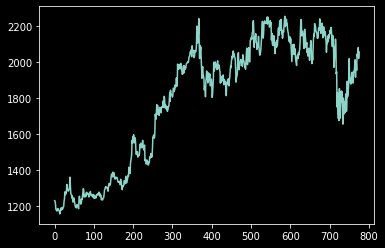

In [ ]:
plt.plot(pred)

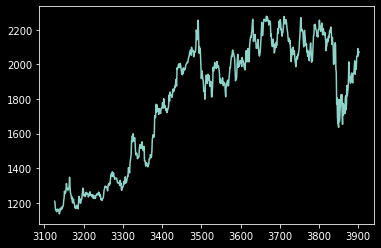

In [ ]:
plt.plot(data[training_data_len:])

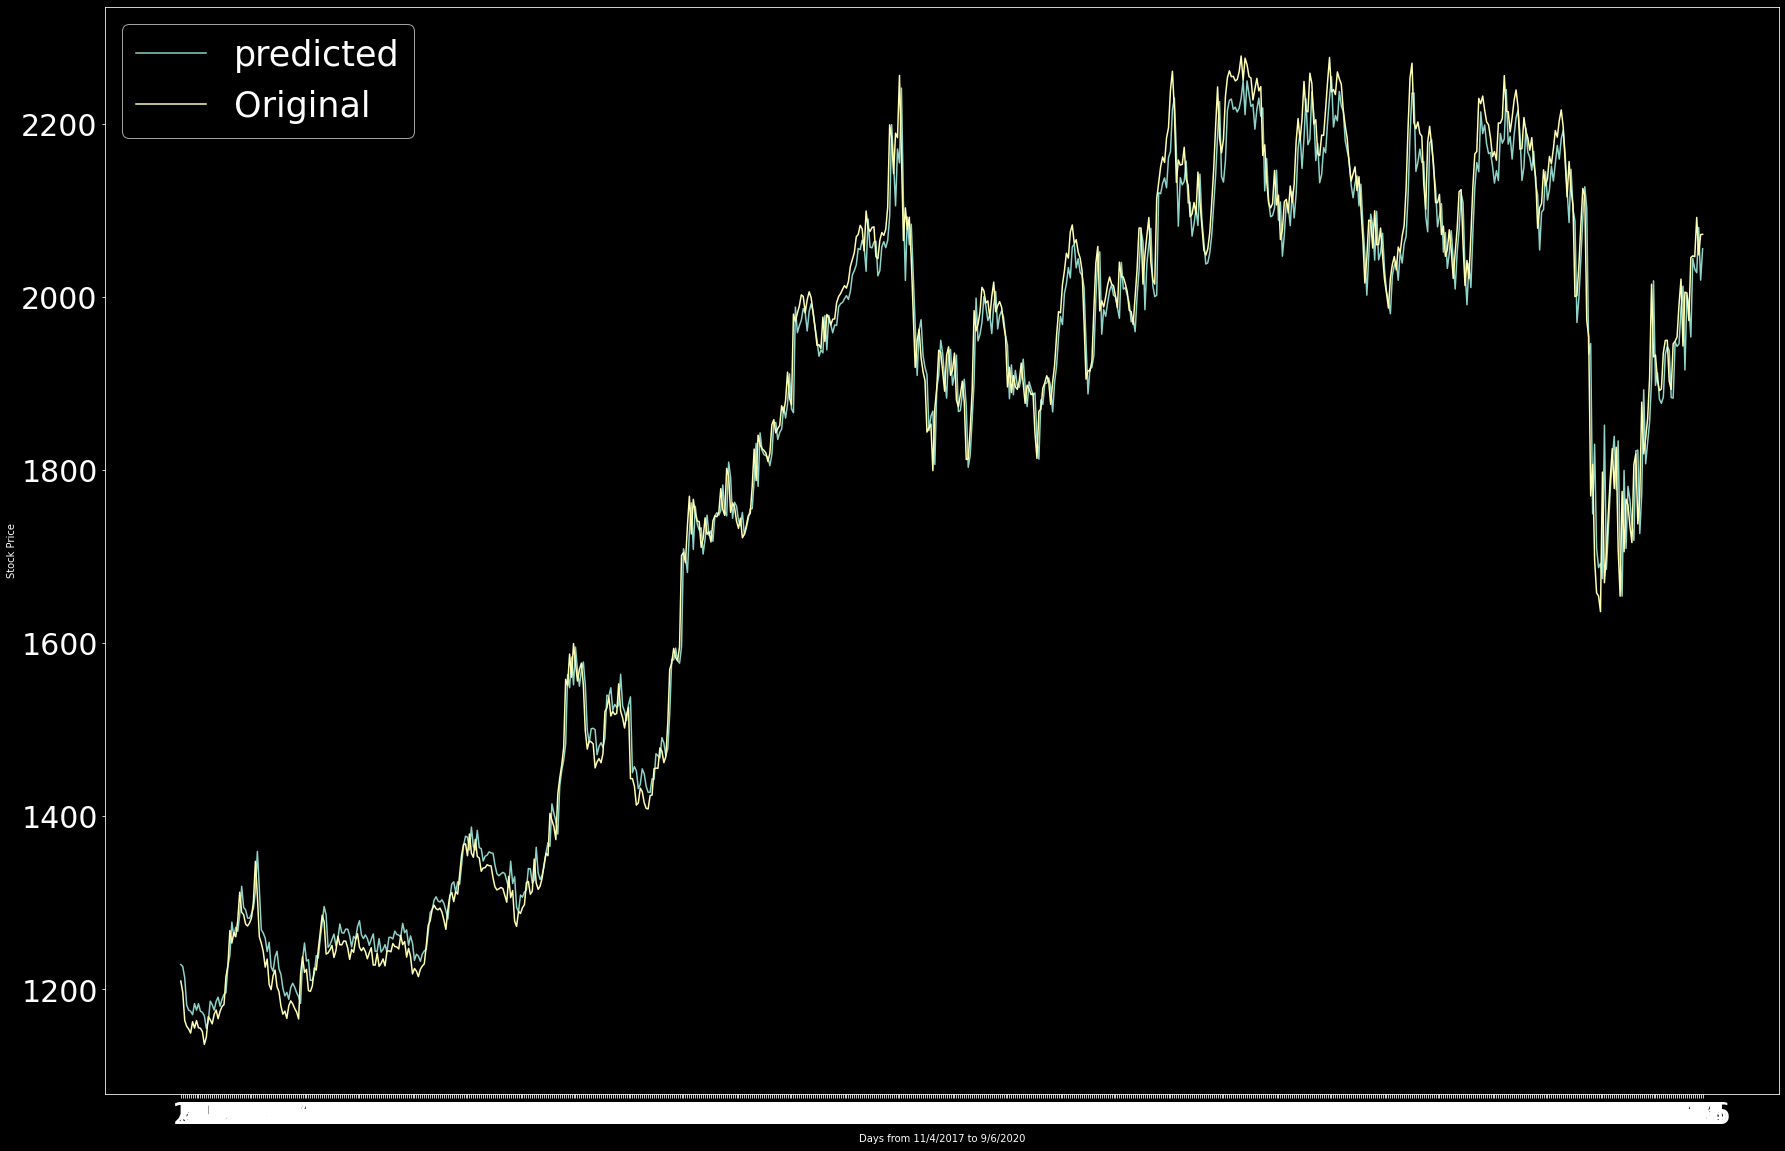

In [ ]:
date = df.filter( 'Date' )[ training_data_len:]
l = np.arange(1,777,1)
fig = plt.figure(figsize=(30,20))
fig = plt.plot(l,pred,label='predicted')
fig = plt.plot(l,data[training_data_len:],label='Original')
plt.xlabel('Days from 11/4/2017 to 9/6/2020')
plt.ylabel('Stock Price')
plt.xticks(l,fontsize=30)
plt.yticks(fontsize=30)
plt.legend(prop={'size':35})
plt.savefig('E:\Study matters')

In [ ]:
y_test = np.array(data[training_data_len:])

In [ ]:
for i in range(776):
  #print(pred[i] - y_test[i] )
  pass

In [ ]:
print(np.array(df.iloc[:,0])[training_data_len:])

['2017-04-11' '2017-04-12' '2017-04-13' '2017-04-17' '2017-04-18'
 '2017-04-19' '2017-04-20' '2017-04-21' '2017-04-24' '2017-04-25'
 '2017-04-26' '2017-04-27' '2017-04-28' '2017-05-02' '2017-05-03'
 '2017-05-04' '2017-05-05' '2017-05-08' '2017-05-09' '2017-05-10'
 '2017-05-11' '2017-05-12' '2017-05-15' '2017-05-16' '2017-05-17'
 '2017-05-18' '2017-05-19' '2017-05-22' '2017-05-23' '2017-05-24'
 '2017-05-25' '2017-05-26' '2017-05-29' '2017-05-30' '2017-05-31'
 '2017-06-01' '2017-06-02' '2017-06-05' '2017-06-06' '2017-06-07'
 '2017-06-08' '2017-06-09' '2017-06-12' '2017-06-13' '2017-06-14'
 '2017-06-15' '2017-06-16' '2017-06-19' '2017-06-20' '2017-06-21'
 '2017-06-22' '2017-06-23' '2017-06-27' '2017-06-28' '2017-06-29'
 '2017-06-30' '2017-07-03' '2017-07-04' '2017-07-05' '2017-07-06'
 '2017-07-07' '2017-07-10' '2017-07-11' '2017-07-12' '2017-07-13'
 '2017-07-14' '2017-07-17' '2017-07-18' '2017-07-19' '2017-07-20'
 '2017-07-21' '2017-07-24' '2017-07-25' '2017-07-26' '2017-07-27'
 '2017-07-

In [ ]:
plt.show(fig)

In [ ]:
print(np.array(df.iloc[:,0])[training_data_len:].T)

['2017-04-11' '2017-04-12' '2017-04-13' '2017-04-17' '2017-04-18'
 '2017-04-19' '2017-04-20' '2017-04-21' '2017-04-24' '2017-04-25'
 '2017-04-26' '2017-04-27' '2017-04-28' '2017-05-02' '2017-05-03'
 '2017-05-04' '2017-05-05' '2017-05-08' '2017-05-09' '2017-05-10'
 '2017-05-11' '2017-05-12' '2017-05-15' '2017-05-16' '2017-05-17'
 '2017-05-18' '2017-05-19' '2017-05-22' '2017-05-23' '2017-05-24'
 '2017-05-25' '2017-05-26' '2017-05-29' '2017-05-30' '2017-05-31'
 '2017-06-01' '2017-06-02' '2017-06-05' '2017-06-06' '2017-06-07'
 '2017-06-08' '2017-06-09' '2017-06-12' '2017-06-13' '2017-06-14'
 '2017-06-15' '2017-06-16' '2017-06-19' '2017-06-20' '2017-06-21'
 '2017-06-22' '2017-06-23' '2017-06-27' '2017-06-28' '2017-06-29'
 '2017-06-30' '2017-07-03' '2017-07-04' '2017-07-05' '2017-07-06'
 '2017-07-07' '2017-07-10' '2017-07-11' '2017-07-12' '2017-07-13'
 '2017-07-14' '2017-07-17' '2017-07-18' '2017-07-19' '2017-07-20'
 '2017-07-21' '2017-07-24' '2017-07-25' '2017-07-26' '2017-07-27'
 '2017-07-

In [ ]:
print(np.array(df.iloc[:,0])[training_data_len:].shape)

(776,)


In [ ]:
print(np.array(df.iloc[:,0])[training_data_len:].T.shape)

(776,)


In [ ]:
print(np.array(df.iloc[:,0])[training_data_len:].reshape(776,1))

[['2017-04-11']
 ['2017-04-12']
 ['2017-04-13']
 ['2017-04-17']
 ['2017-04-18']
 ['2017-04-19']
 ['2017-04-20']
 ['2017-04-21']
 ['2017-04-24']
 ['2017-04-25']
 ['2017-04-26']
 ['2017-04-27']
 ['2017-04-28']
 ['2017-05-02']
 ['2017-05-03']
 ['2017-05-04']
 ['2017-05-05']
 ['2017-05-08']
 ['2017-05-09']
 ['2017-05-10']
 ['2017-05-11']
 ['2017-05-12']
 ['2017-05-15']
 ['2017-05-16']
 ['2017-05-17']
 ['2017-05-18']
 ['2017-05-19']
 ['2017-05-22']
 ['2017-05-23']
 ['2017-05-24']
 ['2017-05-25']
 ['2017-05-26']
 ['2017-05-29']
 ['2017-05-30']
 ['2017-05-31']
 ['2017-06-01']
 ['2017-06-02']
 ['2017-06-05']
 ['2017-06-06']
 ['2017-06-07']
 ['2017-06-08']
 ['2017-06-09']
 ['2017-06-12']
 ['2017-06-13']
 ['2017-06-14']
 ['2017-06-15']
 ['2017-06-16']
 ['2017-06-19']
 ['2017-06-20']
 ['2017-06-21']
 ['2017-06-22']
 ['2017-06-23']
 ['2017-06-27']
 ['2017-06-28']
 ['2017-06-29']
 ['2017-06-30']
 ['2017-07-03']
 ['2017-07-04']
 ['2017-07-05']
 ['2017-07-06']
 ['2017-07-07']
 ['2017-07-10']
 ['2017-

In [ ]:
import csv
f = open('E:\Study matters\Machine Learning\Stocks\TCS\pred.csv','w',newline='')
w = csv.writer(f)

In [ ]:
w.writerow(['Date', 'Original Price', 'Predicted Price'])
for i in range(776):
  w.writerow([np.array(df.iloc[:,0])[training_data_len:].reshape(776,1) , y_test[i] , pred[i] ])


In [ ]:
f.close()

In [ ]:
f = open('E:\Study matters\Machine Learning\Stocks\TCS\pred.csv','r')
c = csv.reader(f)

In [ ]:
for i in c:
  print(i)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
f = open('pred.csv','w',newline='')
w = csv.writer(f)
w.writerow(['Date', 'Original Price', 'Predicted Price'])
for i in range(776):
  w.writerow([np.array(df.iloc[:,0])[training_data_len:].reshape(776,1) , y_test[i] , pred[i] ])
from google.colab import files
files.download('pred.csv')

In [ ]:
type(pred[2])

numpy.ndarray

In [ ]:
f = open('pred.csv','w',newline='')
w = csv.writer(f)
w.writerow(['Date', 'Original Price', 'Predicted Price'])
for i in range(776):
  w.writerow([np.array(df.iloc[:,0])[training_data_len+i] , str(y_test[i])[1:-1] , str(pred[i])[1:-1] ])
from google.colab import files
files.download('pred.csv')